# MNIST Learning
- fully connected layer

### print img

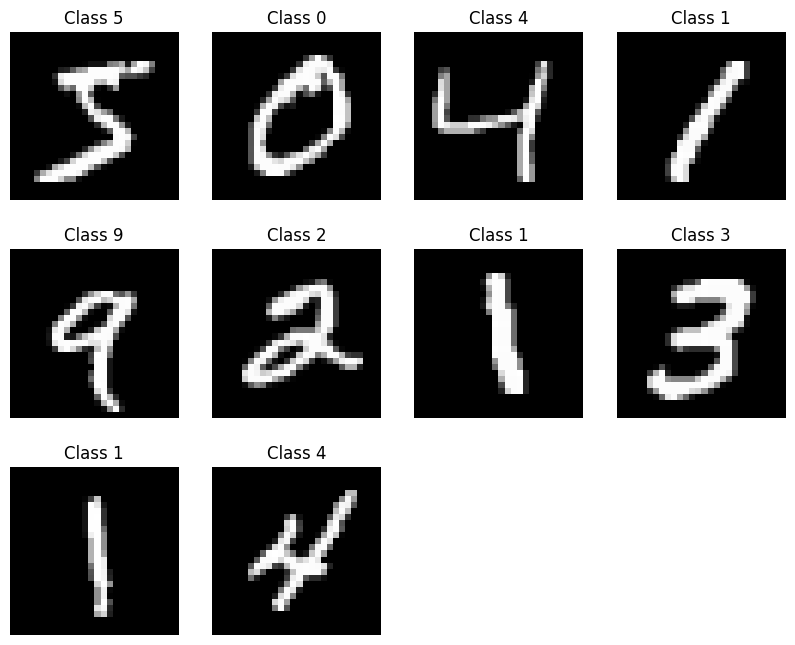

In [4]:
from torchvision.datasets import MNIST
import numpy as np
import matplotlib.pyplot as plt

dataset = MNIST(root="data", train=True, download=True)

count = 10

fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(10, 8))
axes = axes.flatten()
for i in range(count):
    img, label = dataset[i]
    axes[i].imshow(X=img, cmap="gray")
    axes[i].set_title(f"Class {label}")
    axes[i].axis("off")
for ax in axes[count:]:
    ax.set_visible(False)
plt.show()

### make dataset

In [17]:
from torchvision.datasets import MNIST
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader

BATCH_SIZE = 32

dataset = MNIST(root="data", train=True, download=True, transform=ToTensor())

data_size = len(dataset.data)

data_loader = DataLoader(dataset=dataset, batch_size=BATCH_SIZE)

print(len(data_loader))

1875


### model

In [7]:
import torch.nn as nn

class MNISTClassificationModel(nn.Module):
    def __init__(self, layers):
        super(MNISTClassificationModel, self).__init__()
        layer_list  = []
        for idx, layer in enumerate(layers):
            in_feat, out_feat = layer
            layer_list.append(nn.Linear(in_features=in_feat, out_features=out_feat))
            if idx < len(layers)-1:
                layer_list.append(nn.ReLU())
        self.layers = nn.Sequential(*layer_list)

    def forward(self, x):
        return self.layers(x)


### train

In [21]:
import torch
import torch.nn as nn
from torch.optim import SGD
import matplotlib.pyplot as plt
from tqdm import tqdm

LR = 0.003
EPOCHS = 10
DEVICE = "cpu"

if torch.cuda.is_available():
    DEVICE = "cuda"
elif torch.backends.mps.is_available():
    DEVICE = "mps"

model = MNISTClassificationModel(layers=[ (784, 512), (512, 128), (128, 52), (52, 10) ])
loss_function = nn.CrossEntropyLoss()
optimizer = SGD(params=model.parameters(), lr=LR)

epoch_losses, epoch_accs = [], []
for epoch in tqdm(range(EPOCHS), desc="진행중"):
    epoch_loss, epoch_acc = 0., 0
    for X, y in data_loader:
        X, y = X.reshape(BATCH_SIZE, -1).to(DEVICE), y.to(DEVICE)

        pred = model(X)
        loss = loss_function(pred, y)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item() * len(X)
        epoch_acc += (pred.argmax(axis=1) == y).sum().item()
    epoch_losses.append(epoch_loss / data_size)
    epoch_accs.append(epoch_acc / data_size)

진행중: 100%|██████████| 10/10 [01:31<00:00,  9.13s/it]


### visualization

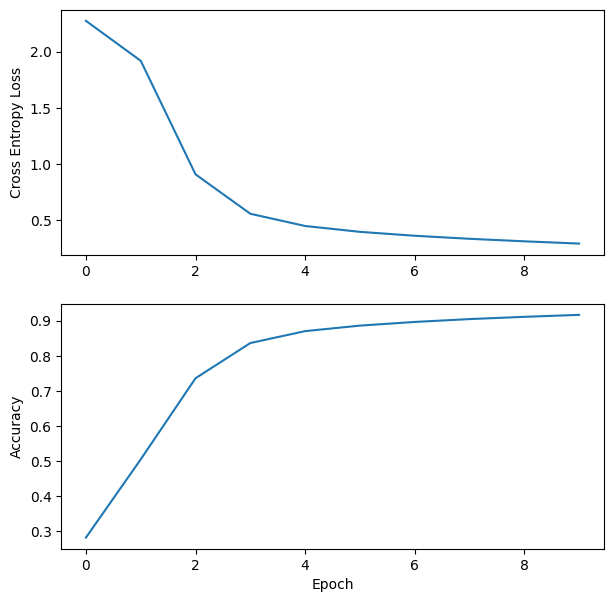

In [22]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(7, 7))
axes[0].plot(range(len(epoch_losses)), epoch_losses)
axes[0].set_ylabel("Cross Entropy Loss")
axes[1].plot(range(len(epoch_accs)), epoch_accs)
axes[1].set_ylabel("Accuracy")
axes[1].set_xlabel("Epoch")
plt.show()